## Decision Tree - Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
df = pd.read_csv("penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Exploratory Data Analysis and Visualization

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [5]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [6]:
10/344

0.029069767441860465

In [7]:
df = df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [9]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [10]:
df["sex"].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [11]:
df["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [12]:
df["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [13]:
df[df["sex"]== "."]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [14]:
df[df.species =="Gentoo"].groupby("sex").describe().T

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

In [15]:
df.loc[336, "sex"] = "MALE"

In [16]:
df.loc[336, "sex"]

'MALE'

In [17]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,334.000000,334.000000,334.000000,334.000000
mean,43.994311,17.160479,201.014970,4209.056886
std,5.460521,1.967909,14.022175,804.836129
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.575000,18.700000,213.000000,4793.750000
max,59.600000,21.500000,231.000000,6300.000000


## Visualization

In [18]:
df["species"].value_counts()

Adelie       146
Gentoo       120
Chinstrap     68
Name: species, dtype: int64

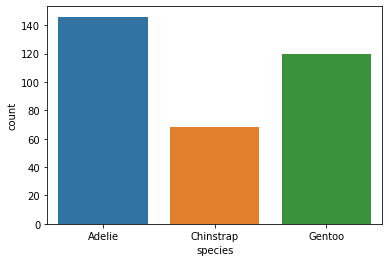

In [19]:
sns.countplot(x="species", data = df);

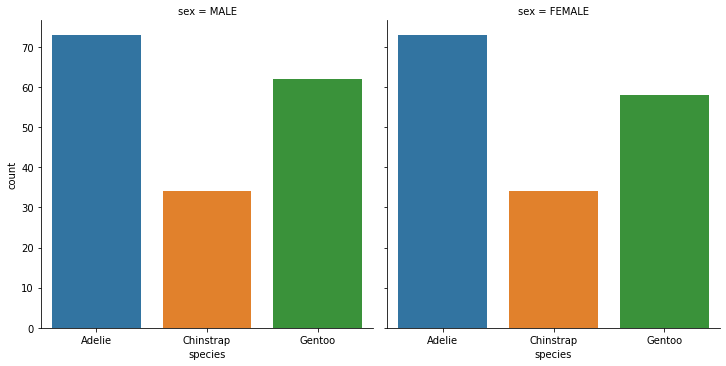

In [20]:
sns.catplot(x='species', data=df, kind='count',col='sex')

<Figure size 864x432 with 0 Axes>

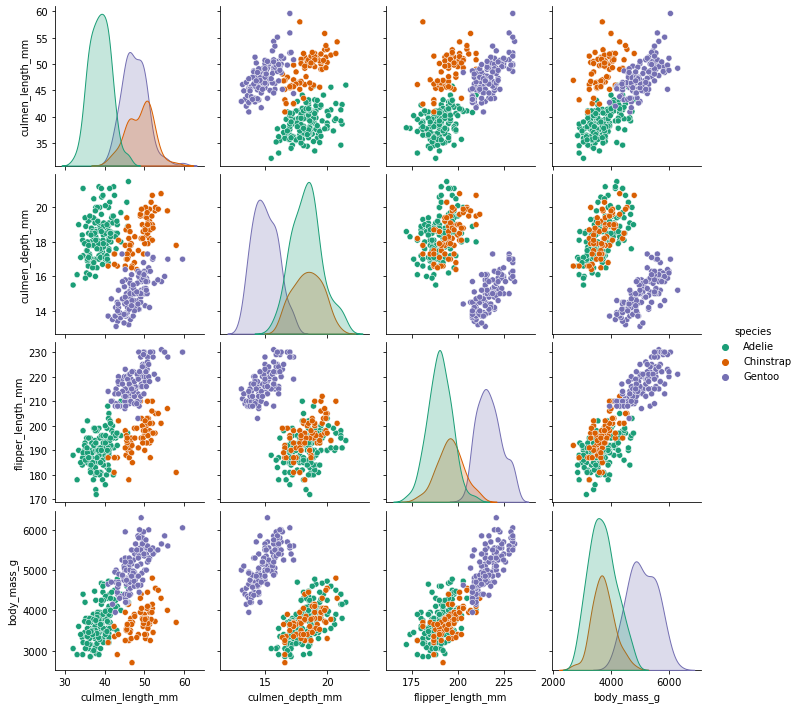

In [21]:
plt.figure(figsize=(12,6))
sns.pairplot(df,hue='species',palette='Dark2')

In [55]:
df.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [56]:
#pip install plotly    

In [57]:
import plotly.express as px

In [58]:
fig = px.scatter_3d(df, 
                    x='culmen_length_mm',
                    y='flipper_length_mm',
                    z='culmen_depth_mm',
                    color='species')
fig.show();

In [59]:
df.select_dtypes("number")

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


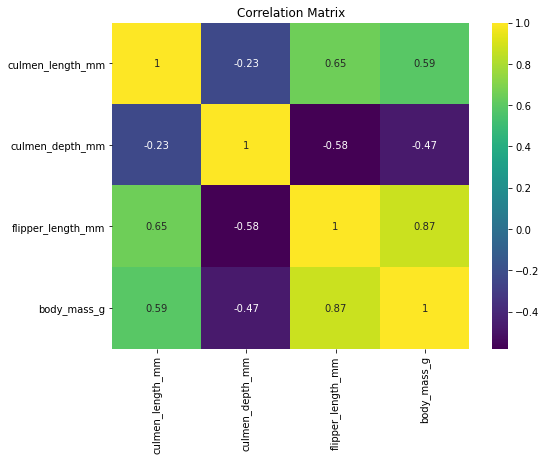

In [60]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes("number").corr(),annot=True, cmap='viridis')
plt.title("Correlation Matrix")

plt.show()

## Feature Engineering

In [61]:
df.drop("species", axis =1)

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...
338,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [62]:
pd.get_dummies(df.drop("species", axis =1), drop_first =True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,0
340,46.8,14.3,215.0,4850.0,0,0,0
341,50.4,15.7,222.0,5750.0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,0


## Train | Test Split

In [27]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [30]:
X_train.shape

(233, 7)

In [31]:
X_train.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
count,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000
mean,43.921888,17.190987,200.802575,4205.901288,0.360515,0.137339,0.502146
std,5.503548,1.995330,14.135569,798.220031,0.481184,0.344946,0.501072
min,32.100000,13.100000,172.000000,2700.000000,0.000000,0.000000,0.000000
25%,39.500000,15.600000,190.000000,3550.000000,0.000000,0.000000,0.000000
50%,44.100000,17.300000,197.000000,4000.000000,0.000000,0.000000,1.000000
75%,48.400000,18.800000,214.000000,4775.000000,1.000000,0.000000,1.000000
max,59.600000,21.500000,231.000000,6050.000000,1.000000,1.000000,1.000000


# Modelling - Decision Tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
DT_model = DecisionTreeClassifier(random_state=101)

In [34]:
DT_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=101)

In [35]:
y_pred = DT_model.predict(X_test)

## Model Performance on Classification Tasks

In [36]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [37]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

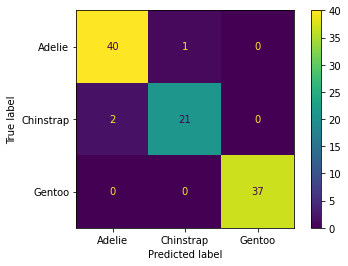

In [38]:
plot_confusion_matrix(DT_model,X_test,y_test)

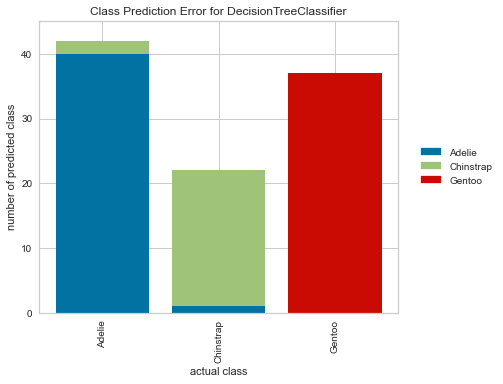

In [39]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(DT_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

In [40]:
eval_metric(DT_model, X_train, y_train, X_test, y_test)

Test_Set
[[40  1  0]
 [ 2 21  0]
 [ 0  0 37]]
              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96        41
   Chinstrap       0.95      0.91      0.93        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.97      0.96      0.97       101
weighted avg       0.97      0.97      0.97       101


Train_Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



## Cross Validate

In [41]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer

In [42]:
model = DecisionTreeClassifier(random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision_micro,test_recall_micro,test_f1_micro
1,0.003943,0.009997,0.958333,0.958333,0.958333,0.958333
2,0.002034,0.004967,0.958333,0.958333,0.958333,0.958333
3,0.003001,0.002999,0.916667,0.916667,0.916667,0.916667
4,0.006022,0.004979,0.956522,0.956522,0.956522,0.956522
5,0.003526,0.003001,1.000000,1.000000,1.000000,1.000000
6,0.003046,0.003958,1.000000,1.000000,1.000000,1.000000
7,0.003997,0.005002,1.000000,1.000000,1.000000,1.000000
8,0.003044,0.006022,1.000000,1.000000,1.000000,1.000000
9,0.004063,0.002994,0.869565,0.869565,0.869565,0.869565
10,0.003937,0.007062,1.000000,1.000000,1.000000,1.000000


In [43]:
df_scores.mean()[2:]

test_accuracy           0.965942
test_precision_micro    0.965942
test_recall_micro       0.965942
test_f1_micro           0.965942
dtype: float64

## Feature Importances

In [44]:
DT_model.feature_importances_

array([0.32591819, 0.05289252, 0.54282921, 0.        , 0.07836008,
       0.        , 0.        ])

In [45]:
df_f_i = pd.DataFrame(index=X.columns, data = DT_model.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance",ascending=False)
df_f_i

,Feature Importance
flipper_length_mm,0.542829
culmen_length_mm,0.325918
island_Dream,0.078360
culmen_depth_mm,0.052893
body_mass_g,0.000000
island_Torgersen,0.000000
sex_MALE,0.000000


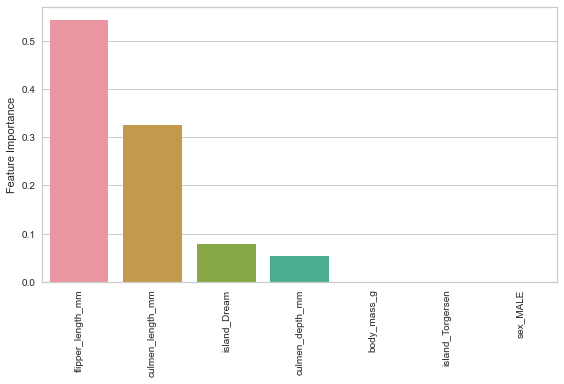

In [46]:
sns.barplot(x = df_f_i.index, y = 'Feature Importance', data = df_f_i)
plt.xticks(rotation = 90)
plt.tight_layout()

## Drop most important feature

In [47]:
X2 = X.drop(columns = ["flipper_length_mm"]) 
# The feature that weighs too much on the estimate can sometimes cause overfitting. For this reason, the most important feature can be dropped and the scores can be checked again

In [48]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.3, random_state=101)

In [49]:
DT2_model = DecisionTreeClassifier(random_state=101)

In [50]:
DT2_model.fit(X_train2, y_train2) 

DecisionTreeClassifier(random_state=101)

In [51]:
eval_metric(DT2_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[41  0  0]
 [ 1 22  0]
 [ 1  0 36]]
              precision    recall  f1-score   support

      Adelie       0.95      1.00      0.98        41
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      0.97      0.99        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101


Train_Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



In [52]:
model = DecisionTreeClassifier(random_state=101)

# scores = cross_validate(model, X_train2, y_train2, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
scores = cross_validate(model, X_train2, y_train2, scoring = ["accuracy", "precision_macro", "recall_macro", "f1_macro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision_macro,test_recall_macro,test_f1_macro
1,0.004002,0.003999,1.000000,1.000000,1.000000,1.000000
2,0.003053,0.003946,1.000000,1.000000,1.000000,1.000000
3,0.003063,0.002996,0.958333,0.944444,0.966667,0.952153
4,0.003009,0.005935,1.000000,1.000000,1.000000,1.000000
5,0.004048,0.002995,1.000000,1.000000,1.000000,1.000000
6,0.003011,0.004945,1.000000,1.000000,1.000000,1.000000
7,0.004052,0.003984,1.000000,1.000000,1.000000,1.000000
8,0.002967,0.008996,1.000000,1.000000,1.000000,1.000000
9,0.003044,0.005000,1.000000,1.000000,1.000000,1.000000
10,0.003959,0.005040,0.956522,0.962963,0.969697,0.964519


In [53]:
df_scores.mean()[2:]

test_accuracy           0.991486
test_precision_macro    0.990741
test_recall_macro       0.993636
test_f1_macro           0.991667
dtype: float64

In [54]:
from sklearn.metrics import make_scorer

In [54]:
scoring = {'precision-Adelie': make_scorer(precision_score,  average=None, labels=["Adelie"]),
           'recall-Adelie': make_scorer(recall_score, average=None, labels =["Adelie"]),
           'f1-Adelie': make_scorer(f1_score, average=None, labels = ["Adelie"]),
          
          'precision-Chinstrap': make_scorer(precision_score,  average=None, labels=["Chinstrap"]),
          'recall-Chinstrap': make_scorer(recall_score, average=None, labels=["Chinstrap"]),
          'f1-Chinstrap': make_scorer(f1_score, average=None, labels=["Chinstrap"]),
          
          
          'precision-Gentoo': make_scorer(precision_score,  average=None, labels=["Gentoo"]),
          'recall-Gentoo': make_scorer(recall_score, average=None, labels = ["Gentoo"]),
          'f1-Gentoo': make_scorer(f1_score, average=None, labels = ["Gentoo"]),
          
          }

In [55]:
model = DecisionTreeClassifier(max_depth=None, random_state=101)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision-Adelie       1.000000
test_recall-Adelie          0.980909
test_f1-Adelie              0.989975
test_precision-Chinstrap    0.983333
test_recall-Chinstrap       1.000000
test_f1-Chinstrap           0.990909
test_precision-Gentoo       0.988889
test_recall-Gentoo          1.000000
test_f1-Gentoo              0.994118
dtype: float64

## Visualize the Tree

In [56]:
from sklearn.tree import plot_tree

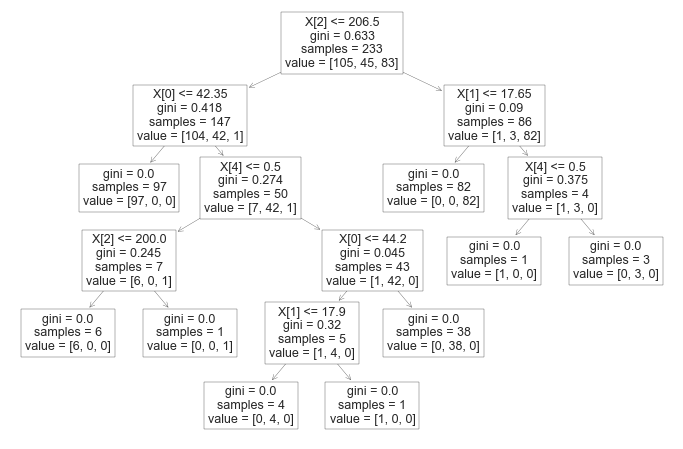

In [57]:
plt.figure(figsize=(12,8))
plot_tree(DT_model);

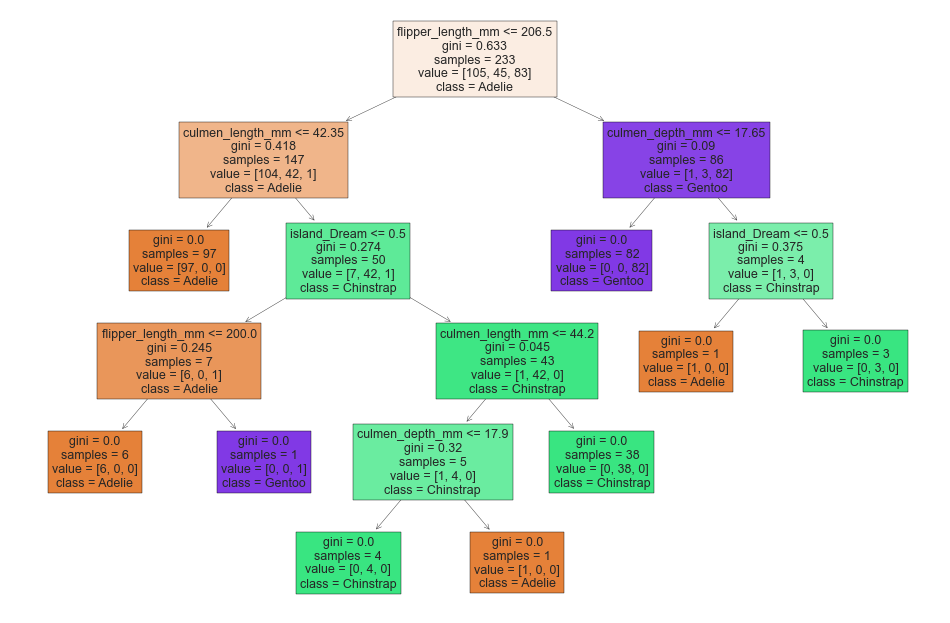

In [58]:
plt.figure(figsize=(12,8),dpi=100)
plot_tree(DT_model, filled=True, feature_names=X.columns, class_names=df.species.unique());

## Understanding Hyperparameters

### Max depth, min samples split, min samples leaf

In [117]:
def report_model(model):
    model_pred = model.predict(X_test)
    model_train_pred = model.predict(X_train)
    print('\n')
    print("Test Set")
    print(confusion_matrix(y_test, model_pred))
    print('\n')
    print(classification_report(y_test,model_pred))
    print('\n')
    print("Train Set")
    print(confusion_matrix(y_train, model_train_pred))
    print('\n')
    print(classification_report(y_train,model_train_pred))
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model,filled=True, feature_names=X.columns, class_names=df.species.unique());

In [144]:
# pruned_tree = DecisionTreeClassifier(max_depth=None, random_state=101,  min_samples_split=8,min_samples_leaf=4)
pruned_tree = DecisionTreeClassifier(max_depth=None, random_state=101)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=101)



Test Set
[[40  1  0]
 [ 1 22  0]
 [ 0  0 37]]


              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        41
   Chinstrap       0.96      0.96      0.96        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101



Train Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



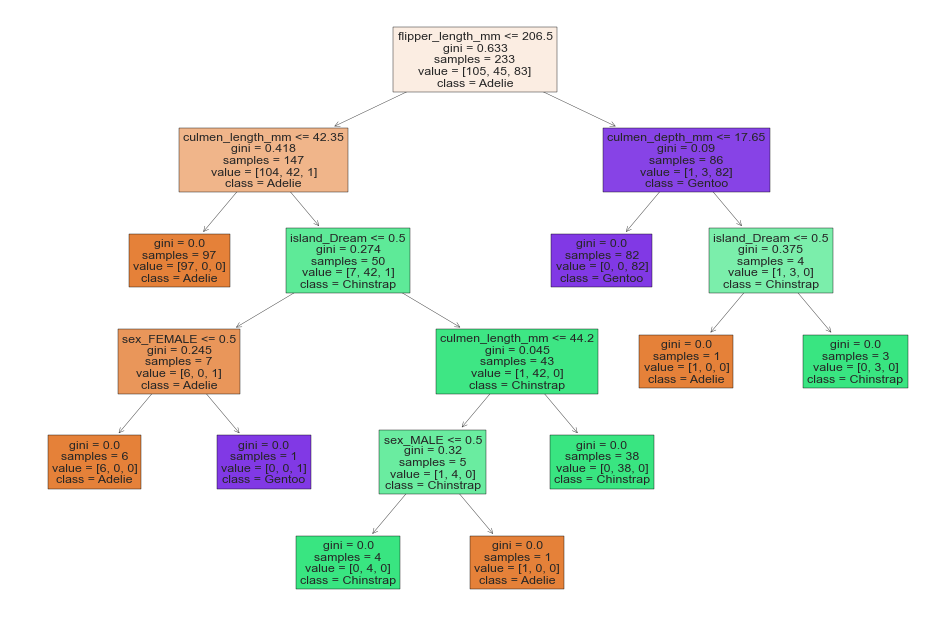

In [145]:
report_model(pruned_tree)

### Max Leaf Nodes

In [63]:
pruned_tree_2 = DecisionTreeClassifier(max_leaf_nodes=7, random_state=101)
pruned_tree_2.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=7, random_state=101)



Test Set
[[39  2  0]
 [ 1 22  0]
 [ 0  0 37]]


              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



Train Set
[[104   1   0]
 [  0  45   0]
 [  0   0  83]]


              precision    recall  f1-score   support

      Adelie       1.00      0.99      1.00       105
   Chinstrap       0.98      1.00      0.99        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       0.99      1.00      0.99       233
weighted avg       1.00      1.00      1.00       233



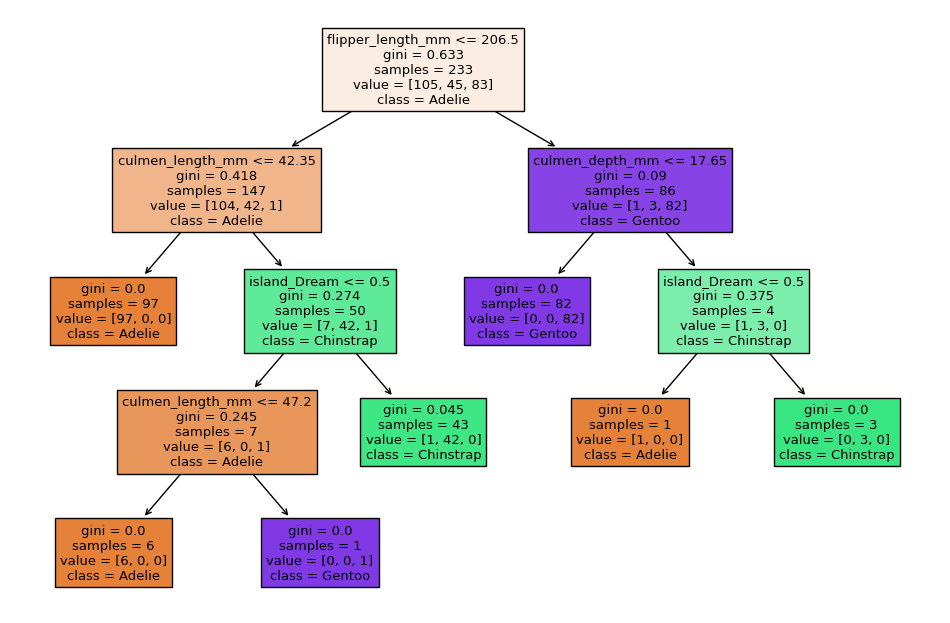

In [64]:
report_model(pruned_tree_2)

## Criterion

In [65]:
entropy_tree = DecisionTreeClassifier(criterion='entropy', random_state=101)
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=101)



Test Set
[[40  1  0]
 [ 1 22  0]
 [ 0  0 37]]


              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        41
   Chinstrap       0.96      0.96      0.96        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101



Train Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



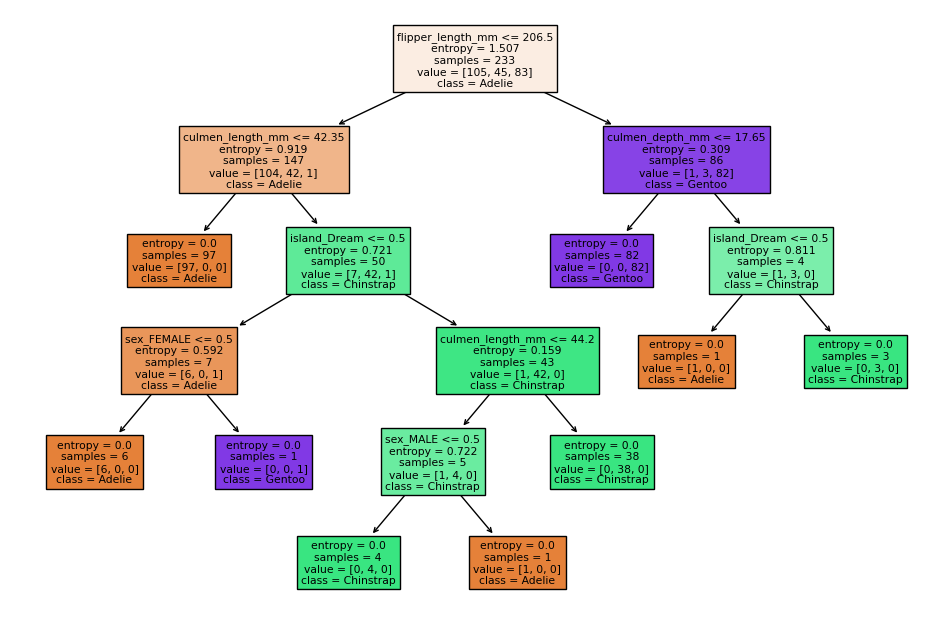

In [66]:
report_model(entropy_tree)

## Max_features, Splitter

In [67]:
tree = DecisionTreeClassifier(splitter = "random", max_features=None)# splitter: to select the feature to set the root node, (default: "best"), max_features for desicion nodes
tree.fit(X_train,y_train)

DecisionTreeClassifier(splitter='random')



Test Set
[[40  1  0]
 [ 1 22  0]
 [ 1  0 36]]


              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96        41
   Chinstrap       0.96      0.96      0.96        23
      Gentoo       1.00      0.97      0.99        37

    accuracy                           0.97       101
   macro avg       0.97      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



Train Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



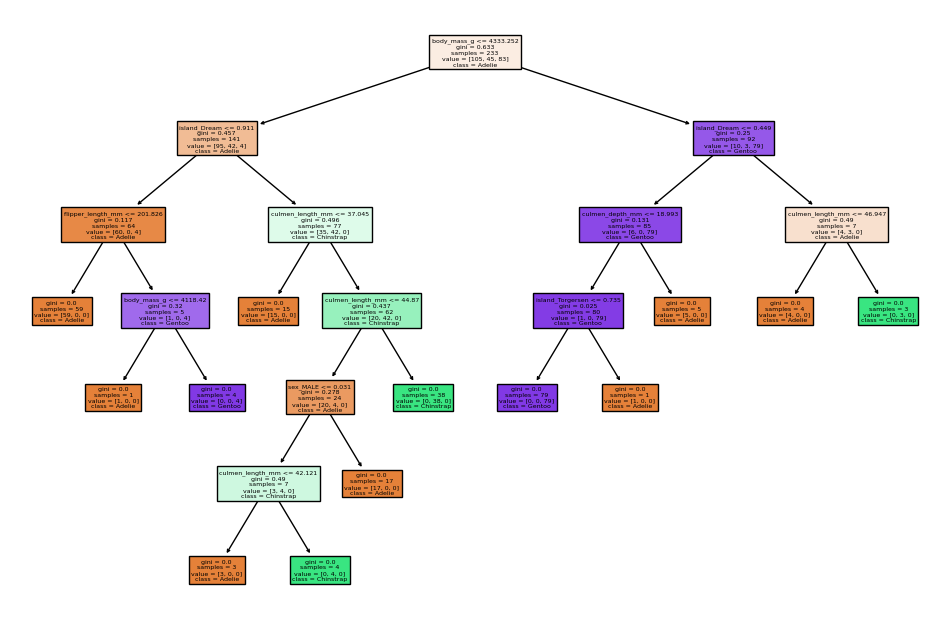

In [68]:
report_model(tree)

## Find Best Parameters

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
model = DecisionTreeClassifier(random_state=101)

In [61]:
param_grid = {"splitter":["best", "random"],
              "max_features":[None, "auto", "log2", 2, 3,4, 5,6, 7],
              "max_depth": [None, 2,3, 4, 5],
              "min_samples_leaf": [1, 2, 3, 4, 5, 6,7],
              "min_samples_split": [2, 3, 5, 6, 7,8,9]}
              #max_features "auto"= sqr(numberof feature)

In [62]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='f1_micro',
                          cv=10,
                          n_jobs = -1)

In [63]:
grid_model.fit(X_train2, y_train2)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [None, 2, 3, 4, 5],
                         'max_features': [None, 'auto', 'log2', 2, 3, 4, 5, 6,
                                          7],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             scoring='f1_micro')

In [64]:
grid_model.best_params_

{'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [65]:
eval_metric(DT2_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[41  0  0]
 [ 1 22  0]
 [ 1  0 36]]
              precision    recall  f1-score   support

      Adelie       0.95      1.00      0.98        41
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      0.97      0.99        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101


Train_Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233

